In [1]:
%matplotlib ipympl

In [2]:
# initialization
from rayoptics.environment import *

import rayoptics.optical.paraxialdesign as pxd

# Create a new model

In [3]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## Define first order aperture and field for system

In [4]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=40.0)
osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0., 20.0])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

## Define interface and gap data for the sequential model

In [5]:
opm.radius_mode = True

sm.gaps[0].thi=200.0

sm.add_surface([50.0, 15.0, 1.500, 62.5])
sm.add_surface([-50.0, 65.517241])

## Update the model

In [6]:
opm.update_model()

## Build the paraxial model and list

In [7]:
#lens = pxd.build_lens(sm)
pm.list_lens()
print("\n")
osp.parax_data[2].list_first_order_data()

       ax_ray_ht    ax_ray_slp
 0:            0           0.1
 1:           20          -0.1
 2:           19         -0.29
 3:      1.1e-07         -0.29

       pr_ray_ht    pr_ray_slp
 0:          -20           0.1
 1:            0           0.1
 2:            1          0.09
 3:       6.8966          0.09

            power           tau        index    type
 0:             0           200      1.00000    transmit
 1:          0.01            10      1.50000    transmit
 2:          0.01        65.517      1.00000    transmit
 3:             0             0      1.00000    transmit


efl               52.63
ffl              -47.37
pp1               5.263
bfl               47.37
ppk               5.263
f/#               1.724
m               -0.3448
red                -2.9
obj_dist            200
obj_ang           5.711
enp_dist             -0
enp_radius           20
na obj           0.0995
n obj                 1
img_dist          65.52
img_ht            6.897
exp_dist         -11.

In [8]:
to_pkg = compute_third_order(opm)
to_pkg

,S-I,S-II,S-III,S-IV,S-V
1,0.722222,0.144444,0.028889,0.026667,0.011111
2,2.094368,-0.218815,0.022861,0.026667,-0.005175
sum,2.816590,-0.074370,0.051750,0.053333,0.005937


In [9]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0          0.1          0.1          -20          0.1          0.1
 1           20   -0.0666667          0.5            0    0.0666667          0.1
 2           19        -0.29        -0.67            1         0.09         0.07
 3      1.1e-07        -0.29        -0.29      6.89655         0.09         0.09


In [10]:
print("Seidel sums")
print(to_pkg)

Seidel sums
          S-I      S-II     S-III      S-IV       S-V
1    0.722222  0.144444  0.028889  0.026667  0.011111
2    2.094368 -0.218815  0.022861  0.026667 -0.005175
sum  2.816590 -0.074370  0.051750  0.053333  0.005937


### convert aberration sums to transverse measure

In [11]:
to_pkg

,S-I,S-II,S-III,S-IV,S-V
1,0.722222,0.144444,0.028889,0.026667,0.011111
2,2.094368,-0.218815,0.022861,0.026667,-0.005175
sum,2.816590,-0.074370,0.051750,0.053333,0.005937


In [12]:
ax_ray, pr_ray, fod = osp.parax_data
n_last = sm.central_rndx(-1)
u_last = ax_ray[-1][mc.slp]
to.seidel_to_transverse_aberration(to_pkg.loc['sum',:], n_last, u_last)

TSA   -4.856190
TCO    0.384673
TAS   -0.359627
SAS   -0.181178
PTB   -0.091954
DST   -0.010235
dtype: float64

### convert sums to wavefront measure

In [13]:
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
to.seidel_to_wavefront(to_pkg.loc['sum',:], central_wv).T

W040    599.211460
W131    -63.287054
W222     44.038015
W220     44.711656
W311      5.051856
dtype: float64

In [14]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.02), interact_mode=transmit)
2 Surface(profile=Spherical(c=-0.02), interact_mode=transmit)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [15]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
yybar_plt = plt.figure(FigureClass=ParaxialDesignFigure, opt_model=opm, dgm_type='ht', refresh_gui=None)
def refresh_yybar():
    opm.update_model()
    yybar_plt.update_data()
    yybar_plt.plot()

yybar_plt.refresh_gui=refresh_yybar

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

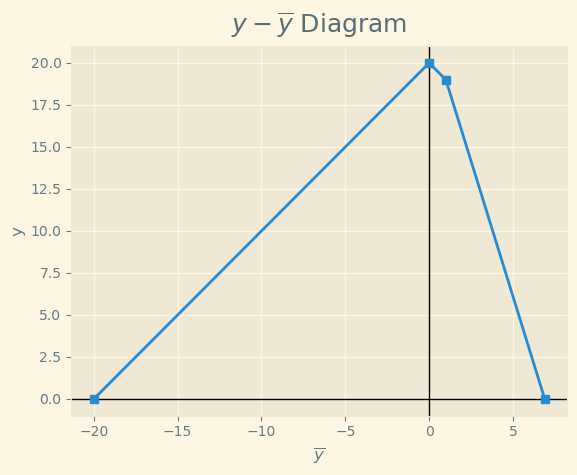

In [17]:
refresh_yybar()
yybar_plt.plot()

In [18]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

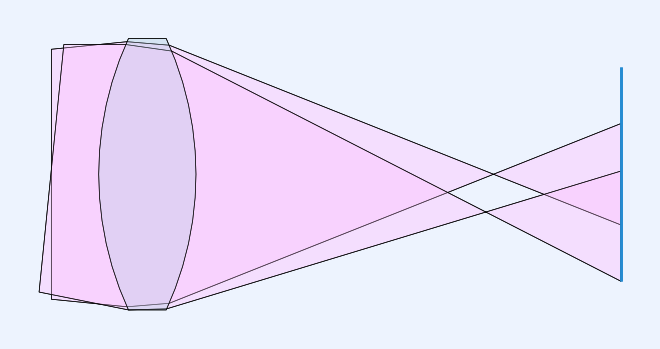

In [19]:
layout_plt.update_data()
layout_plt.plot()

In [20]:
print(layout_plt.ele_bbox)
print(layout_plt.ray_bbox)
print(layout_plt.sys_bbox)

[[ 1.66533454e-14 -2.09171046e+01]
 [ 8.05172410e+01  2.09171046e+01]]
[[ -9.19092288 -20.91710457]
 [ 80.517241    20.43673372]]
[[ -9.19092288 -20.91710457]
 [ 80.517241    20.91710457]]


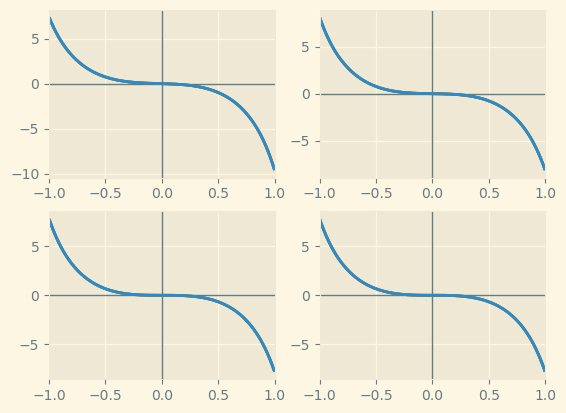

In [21]:
abr_plt.update_data()
abr_plt.plot()

In [22]:
sm.ifcs[2].optical_power/(-0.5)

-0.02